# Carga de datos

In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import GA
from GA import *

In [2]:
with open("berlin52.tsp", "r") as file:
    while True:
        line = file.readline()
        if line == "NODE_COORD_SECTION\n":
            break

    data = []

    while True:
        line = file.readline()
        if line == "EOF\n":
            break

        str_array = line.split()
        data.append(
            (float(str_array[1]), float(str_array[2]), int(str_array[0])))

In [3]:
with open("berlin52.opt.tour", "r") as file:
    while True:
        line = file.readline()
        if line == "TOUR_SECTION\n":
            break

    OPTIMAL = []

    while True:
        line = file.readline()
        if line == "-1\n":
            break
        OPTIMAL.append(int(line))

In [4]:
data_array = np.array(data)
OPTIMAL_array = np.array(OPTIMAL)
camino_optimo = data_array[OPTIMAL_array - 1]

In [5]:
def plot_path(best_individual, title:str=None):
    X = [city[0] for city in best_individual]
    Y = [city[1] for city in best_individual]
    city_numbers = [city[2] for city in best_individual]

    colors = [0] + [1] * (len(best_individual) - 2) + [2]

    plt.figure(figsize=(16, 9))
    if title is not None:
        plt.title(title)
    plt.plot(X, Y)
    last_line_X = [X[len(X) - 1], X[0]]
    last_line_Y = [Y[len(Y) - 1], Y[0]]
    plt.plot(last_line_X, last_line_Y, color="red")
    plt.scatter(X, Y, c=colors)
    plt.show()

In [6]:
ga = genetic_algorithm_class(crossover=crossover_two_points,
                             mutate=mutate_opt_3,
                             selection_method=select_by_tournament,
                             fitness_function=euclidean,
                             population_size=30,
                             elite_size=1,
                             tournament_proportion=0.2,
                             generations=3000,
                             mutation_rate=1,
                             range_of_mutation=20
                            )

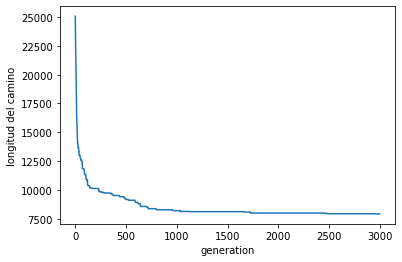

Distancia recorrida: 7916.764192043523


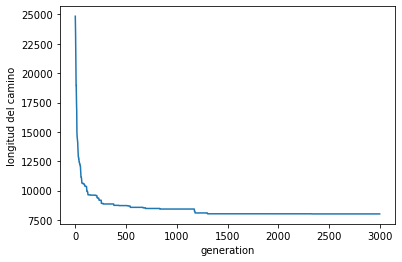

Distancia recorrida: 8010.2764265553105


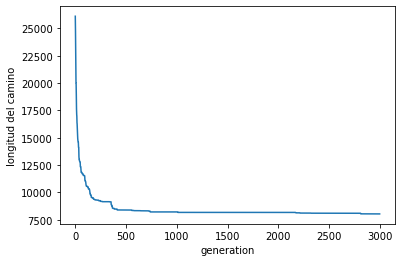

Distancia recorrida: 8029.655426426059


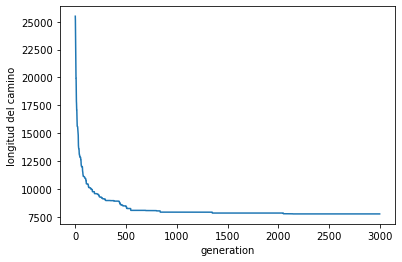

Distancia recorrida: 7758.021753765993


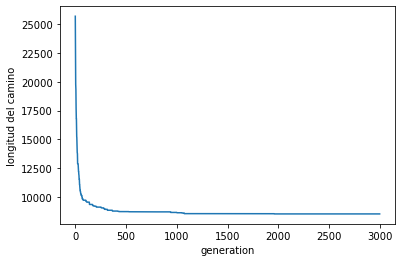

Distancia recorrida: 8518.129407066002


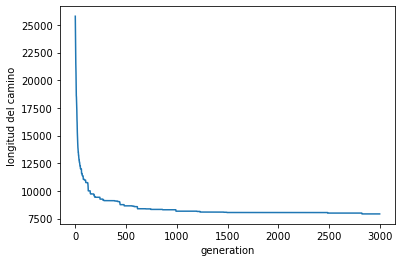

Distancia recorrida: 7916.606063050452


In [7]:
results = []
best_individuals = []
n = 6
for i in range(n):
    best_individual, best_fitness, last_population = ga.solve(data)
    plt.xlabel('generation')
    plt.ylabel('longitud del camino')
    plt.plot(best_fitness)
    plt.show()
    fitness = ga.fitness_function(best_individual)
    print("Distancia recorrida:", fitness)
    best_individuals.append(best_individual)
    results.append(fitness)

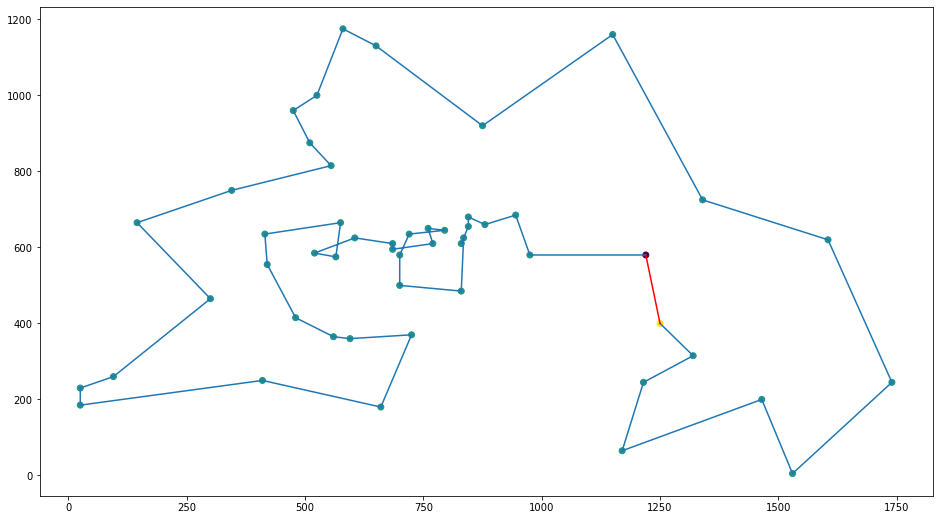

Distancia recorrida: 7916.764192043523


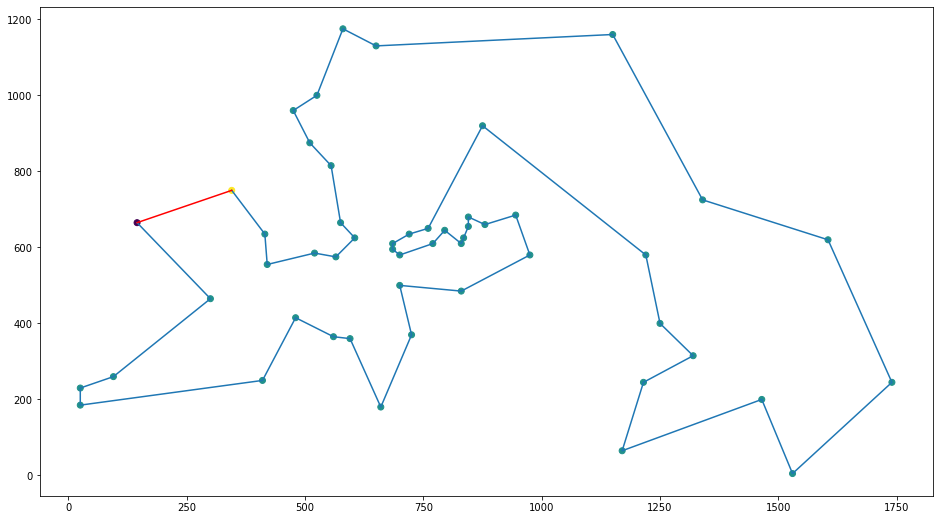

Distancia recorrida: 8010.2764265553105


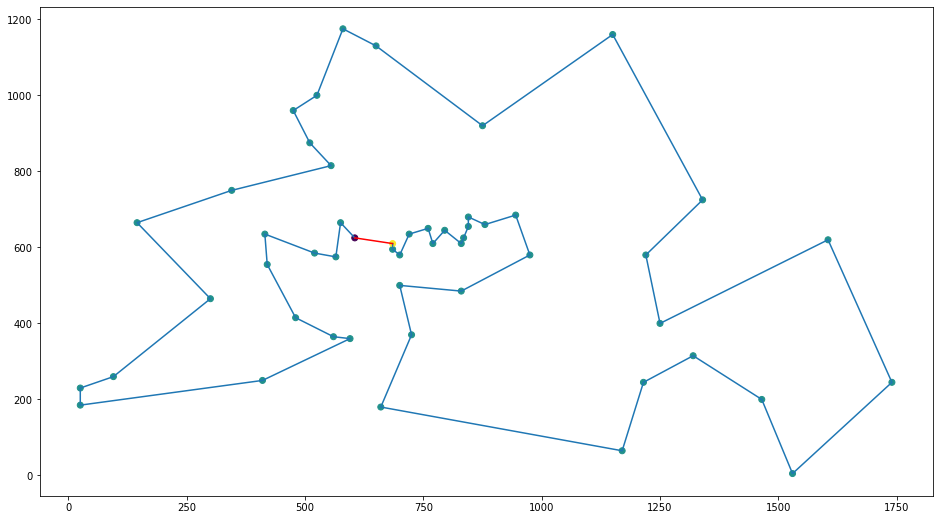

Distancia recorrida: 8029.655426426059


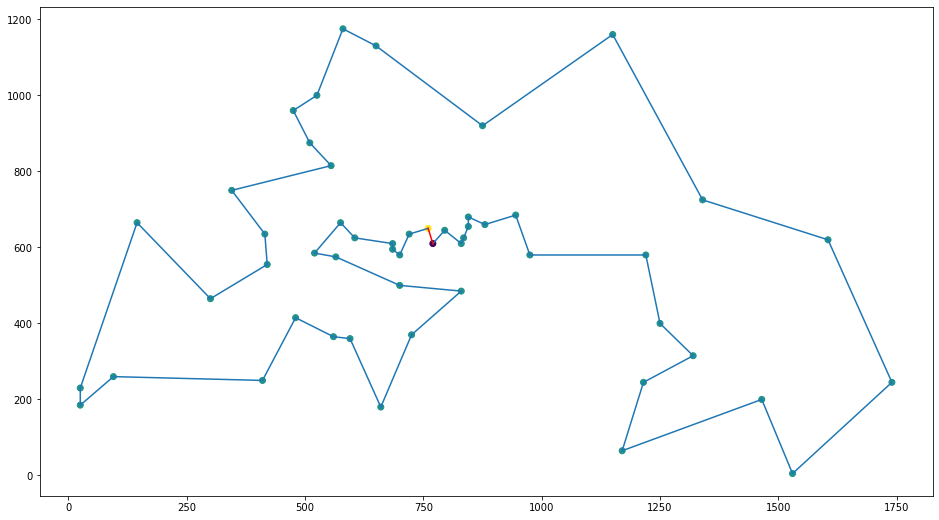

Distancia recorrida: 7758.021753765993


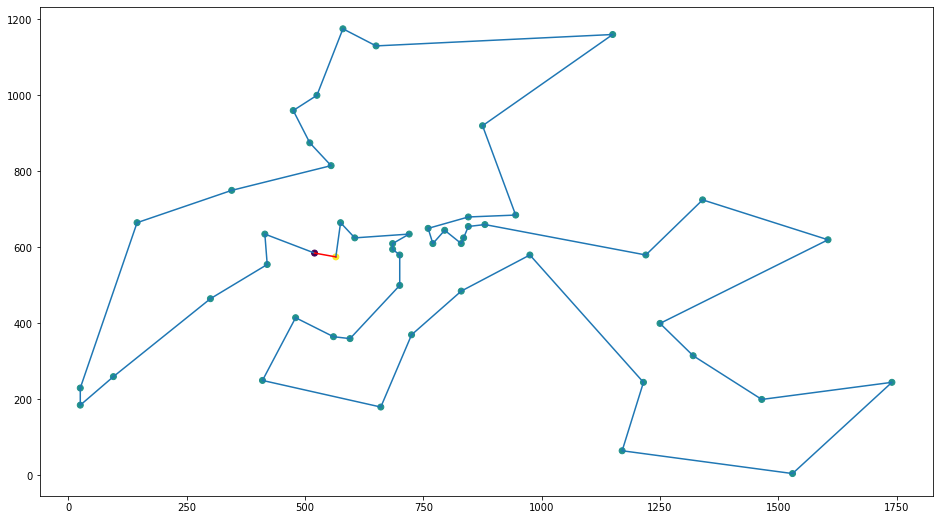

Distancia recorrida: 8518.129407066002


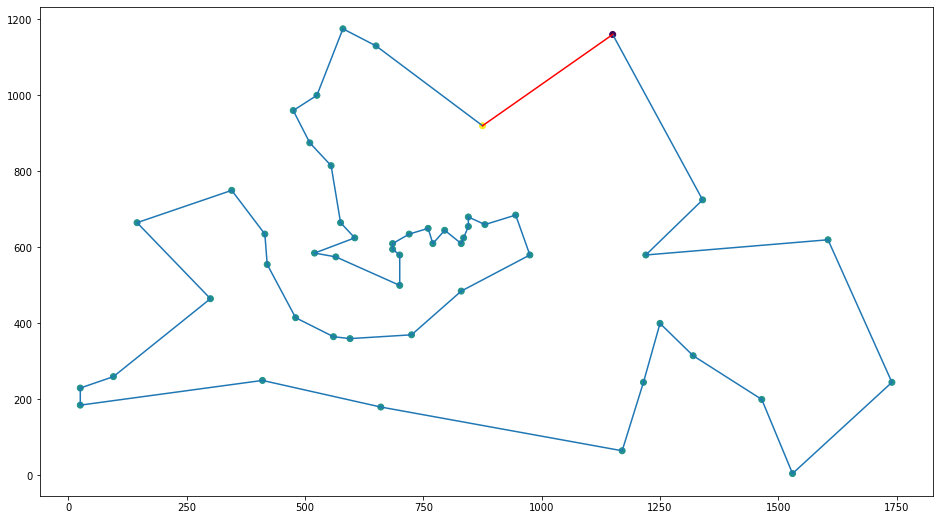

Distancia recorrida: 7916.606063050452


In [8]:
for ind in best_individuals:
    plot_path(ind)
    print("Distancia recorrida:", ga.fitness_function(ind))

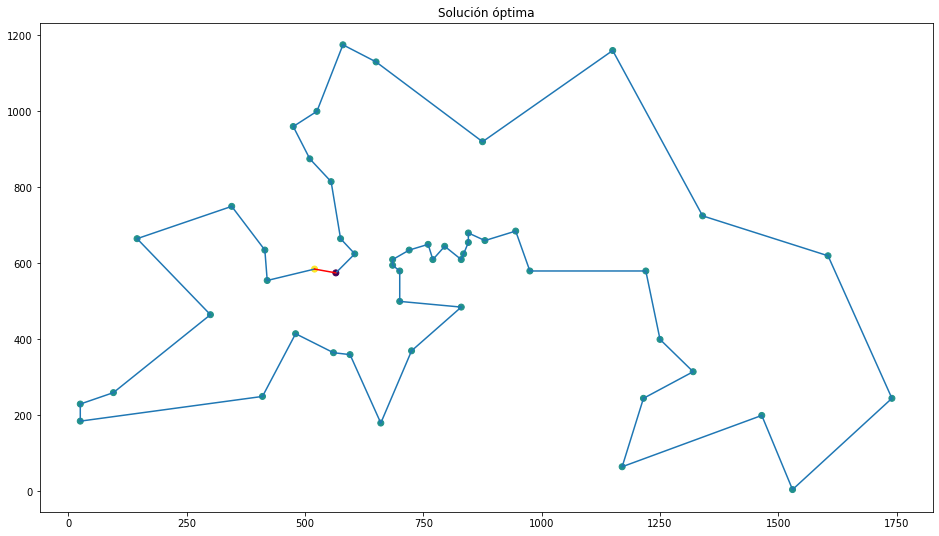

Distancia recorrida: 7544.365901904087


In [9]:
plot_path(camino_optimo, "Solución óptima")
print("Distancia recorrida:", ga.fitness_function(camino_optimo))